In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Typically, when using neural networks for regression, we assume that the response variable is gaussian when conditioned on the input variable.  By maximizing the likelihood under this assumption, the network minimizes RMSE.  However, this assumption fails when we need to learn a multi-valued function.  Below is a function where the gaussian assumption works perfectly fine.

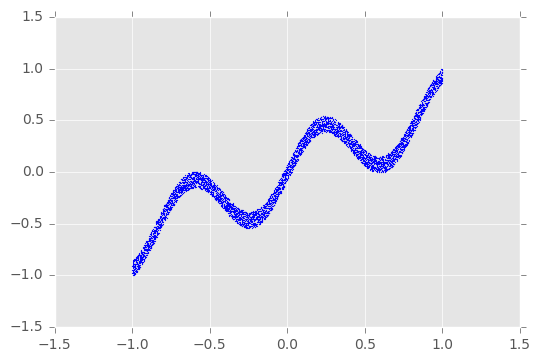

In [2]:
def f1(x):
    return np.sin(.75*x) + 0.2*x + .5*np.random.rand()

def scale(X):
    return 2*((X - X.min()) / (X.max() - X.min())) - 1
    
X = np.linspace(-10, 10, 5000).reshape(-1, 1)
Y = np.array(map(f1, X)).reshape(-1, 1)

X, Y = scale(X), scale(Y)
plt.scatter(X, Y, lw=0, s=.8)
plt.show()

We fit a network using the gaussian assumption.  To predict for a given input, the network samples from the gaussian conditioned on that input.  We draw 20 samples from the learned distribution for each training point.  The network learns the function as expected.

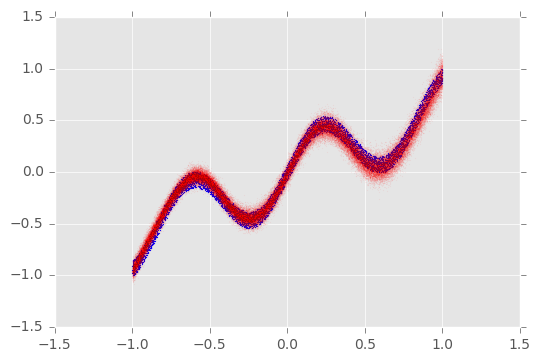

In [3]:
from mixture_density_network import MDN

gaussian_network = MDN(num_mixture_components=1, num_training_steps=20000)
gaussian_network.fit(X, Y)

X_repeat = np.repeat(X.squeeze(), 20).reshape(-1, 1)
preds = gaussian_network.predict(X_repeat)

plt.scatter(X, Y, lw=0, s=.8)
plt.scatter(X_repeat, preds, color='r', lw=0, s=.8, alpha=.05)
plt.show()

However, the network fails to learn the inverse of this function, since the inverse is a multi-valued function and the gaussian assumption is invalid.

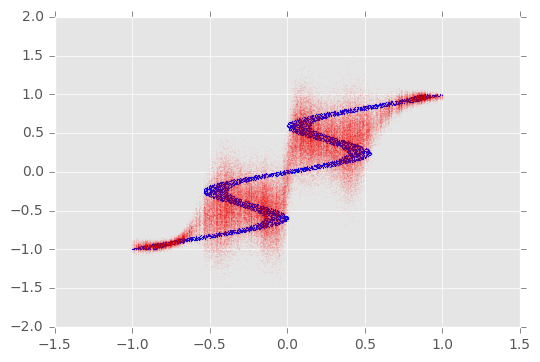

In [4]:
X, Y = Y, X

gaussian_network.fit(X, Y)
X_repeat = np.repeat(X.squeeze(), 20).reshape(-1, 1)
preds = gaussian_network.predict(X_repeat)

plt.scatter(X, Y, lw=0, s=.8)
plt.scatter(X_repeat, preds, color='r', lw=0, s=.8, alpha=.05)
plt.show()

Instead, we can use a mixture density network which models the response variable as a gaussian mixture.  Below we fit a mixture model consisting of 4 gaussians on two different multi-valued functions.

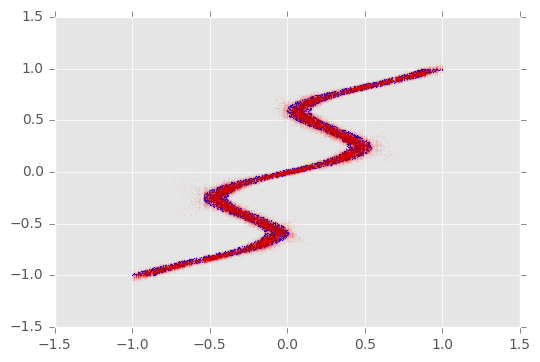

In [5]:
mixture_network = MDN(num_mixture_components=5, num_training_steps=35000, batch_size=1000)

mixture_network.fit(X, Y)
X_repeat = np.repeat(X.squeeze(), 20).reshape(-1, 1)
preds = mixture_network.predict(X_repeat)

plt.scatter(X, Y, lw=0, s=.8)
plt.scatter(X_repeat, preds, color='r', lw=0, s=.8, alpha=.05)
plt.show()

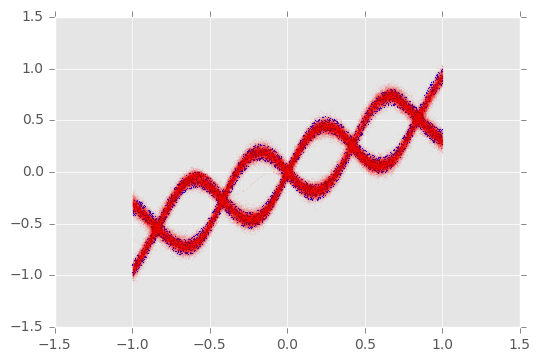

In [7]:
def f2(x):
    if np.random.rand() < .5:
        return np.sin(.75*x) + 0.2*x + .5*np.random.rand()
    else:
        return np.sin(.75*x + np.pi) + 0.2*x + .5*np.random.rand()
    
X = np.linspace(-10, 10, 5000).reshape(-1, 1)
Y = np.array(map(f2, X)).reshape(-1, 1)
X, Y = scale(X), scale(Y)
    
mixture_network.fit(X, Y)
X_repeat = np.repeat(X.squeeze(), 40).reshape(-1, 1)
preds = mixture_network.predict(X_repeat)

plt.scatter(X, Y, lw=0, s=.8)
plt.scatter(X_repeat, preds, color='r', lw=0, s=.8, alpha=.05)
plt.show()